In [110]:
import os
import numpy as np

from matplotlib import pyplot as plt
from scipy.ndimage.filters import gaussian_filter1d
from scipy.signal import savgol_filter

%matplotlib notebook
%matplotlib notebook

In [4]:
def load_video_frames(input_folder):
    l = []
    files = sorted(os.listdir(input_folder))

    for j in range(0, len(files)):
        fname = os.path.join(
            input_folder, files[j])
        l.append(plt.imread(fname))

    return np.array(l)


def load_videos(input_folder):
    d = {}
    for i in os.listdir(input_folder):
        if os.path.isdir(os.path.join(input_folder, i)):
            print(i)
            d[i] = []
            files = sorted(os.listdir(os.path.join(input_folder, i)))

            for j in range(0, len(files)):
                fname = os.path.join(
                    input_folder, i, files[j])
                d[i].append(plt.imread(fname))

    return d

In [5]:
def analyse_frames(frames, window=5, frame_step=1):

    frames = frames[::frame_step]
    
    diff = np.diff(frames, axis=0)
    mse = np.sum(np.square(diff), axis=(1,2,3)).astype(np.float) / frames[0].size
#     print mse.shape
#     print mse

    plt.figure()
    plt.title("Adjancent differences MSE (w:{}, step:{})".format(window, frame_step))
    plt.plot(mse, 'o')
    
    
    silence_diff = frames - frames[0]
    silence_diff.shape
    
    mse = np.sum(np.square(silence_diff), axis=(1,2,3)).astype(np.float) / frames[0].size
#     print mse.shape
#     print mse
    
    plt.figure()
    plt.title("Silence differences MSE (w:{}, step:{})".format(window, frame_step))
    plt.plot(mse, 'o')
    
    
    mean_diff = []
    cumulative_sum = np.sum(frames[:window], axis=0)
    for i in range(window, len(frames)):
        mean_diff.append(frames[i] - cumulative_sum / window)
        cumulative_sum += frames[i]
        cumulative_sum -= frames[i - window]
        
    mse = np.sum(np.square(mean_diff), axis=(1,2,3)).astype(np.float) / frames[0].size

    plt.figure()
    plt.title("Mean differences MSE (w:{}, step:{})".format(window, frame_step))
    plt.plot(mse, 'o')

<IPython.core.display.Javascript object>


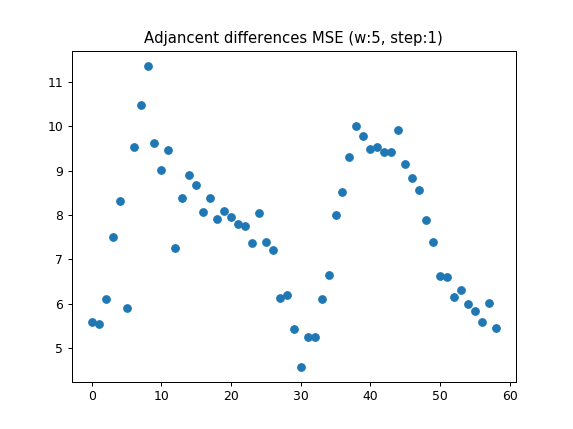

<IPython.core.display.Javascript object>


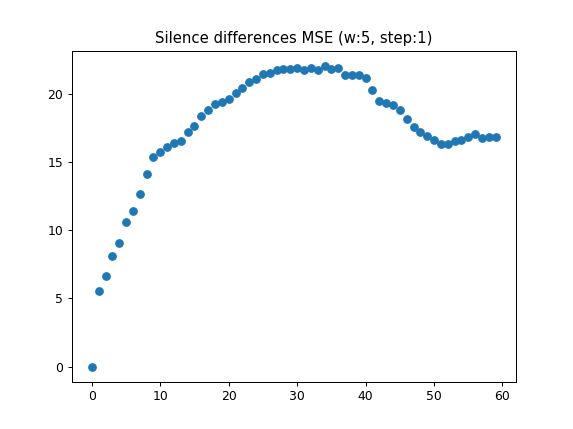

<IPython.core.display.Javascript object>


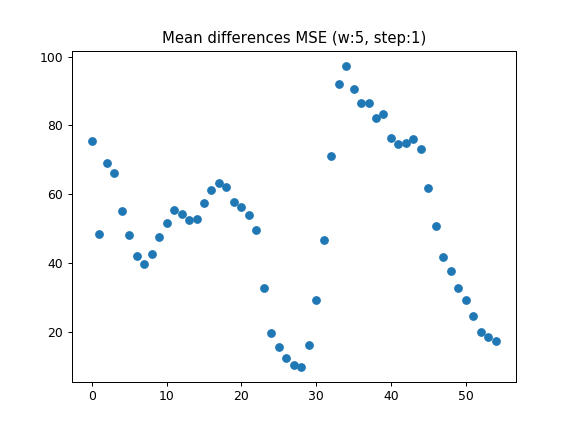

<IPython.core.display.Javascript object>


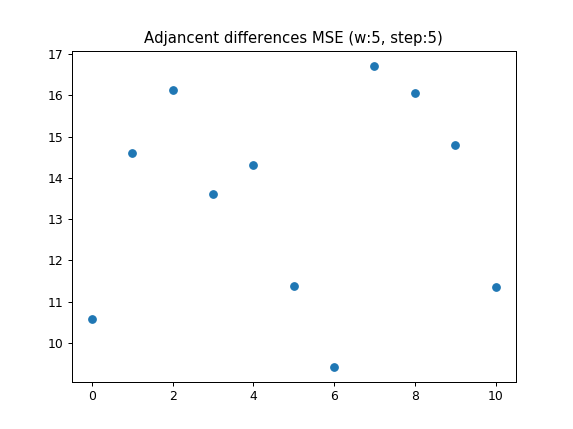

<IPython.core.display.Javascript object>


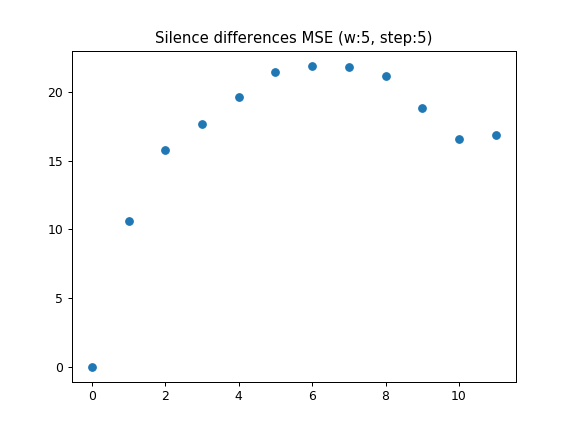

<IPython.core.display.Javascript object>


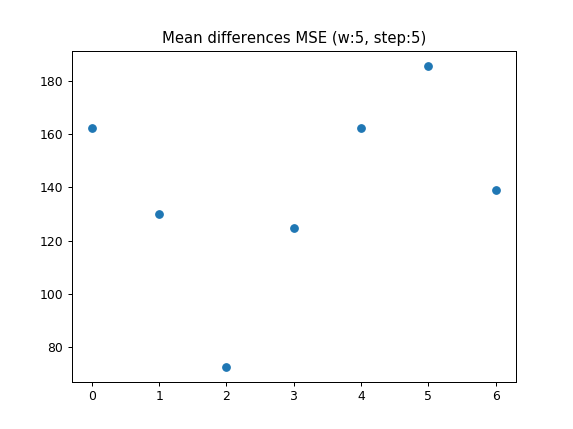

<IPython.core.display.Javascript object>


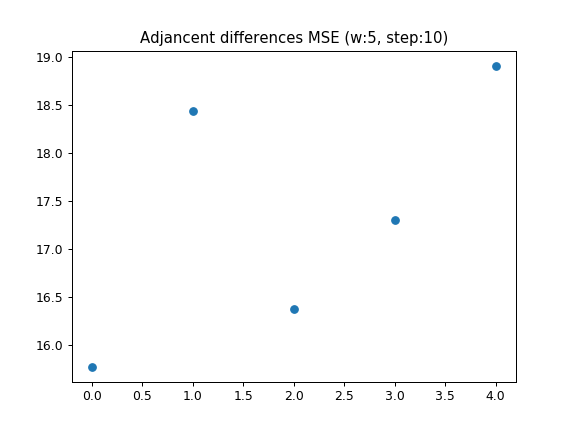

<IPython.core.display.Javascript object>


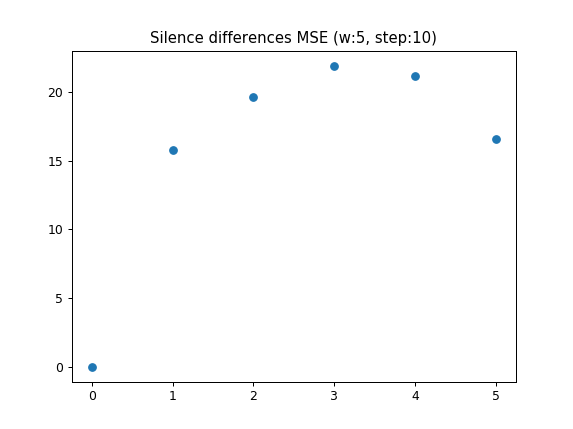

<IPython.core.display.Javascript object>


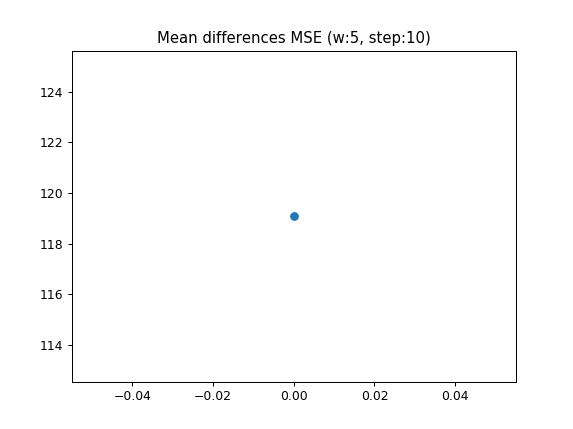

In [7]:
input_folder = '/media/schenock/01D1B41ED893D2C0/Projects/probable-joke/data/asl/01-M-01-C-comp'
frames = load_video_frames(input_folder)
analyse_frames(frames)

analyse_frames(frames, frame_step=5)

analyse_frames(frames, frame_step=10)

<IPython.core.display.Javascript object>


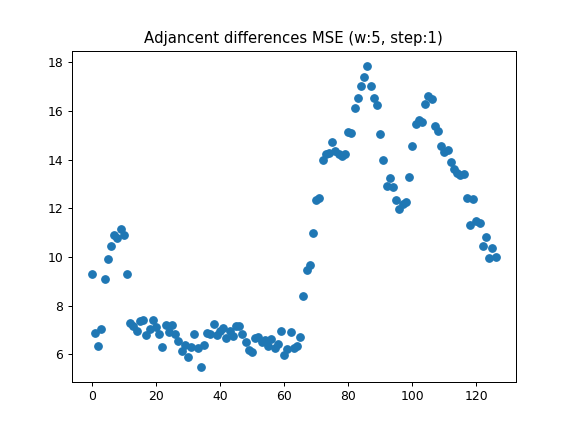

<IPython.core.display.Javascript object>


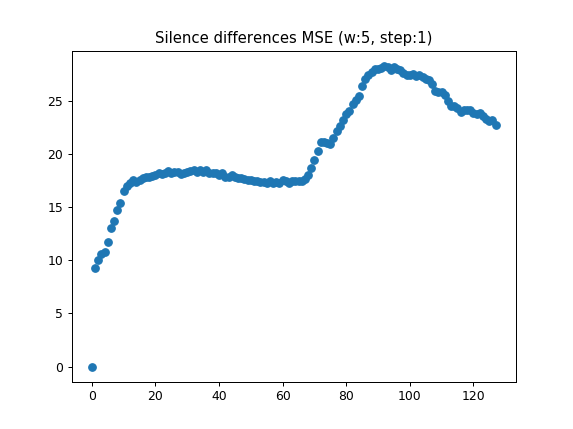

<IPython.core.display.Javascript object>


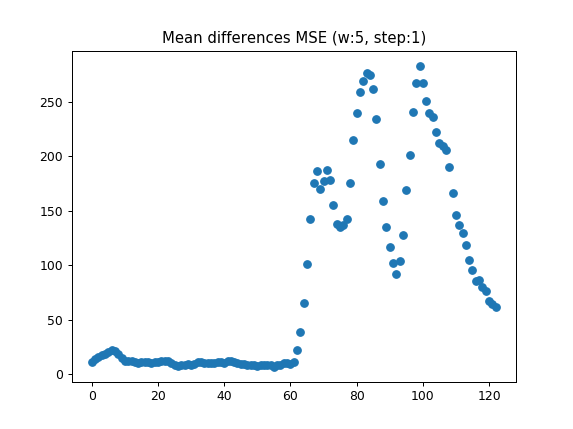

<IPython.core.display.Javascript object>


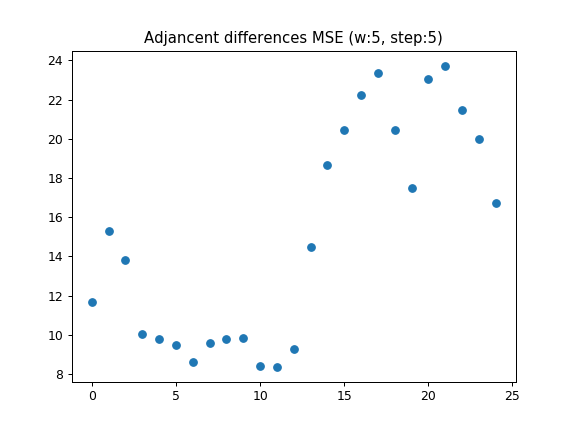

<IPython.core.display.Javascript object>


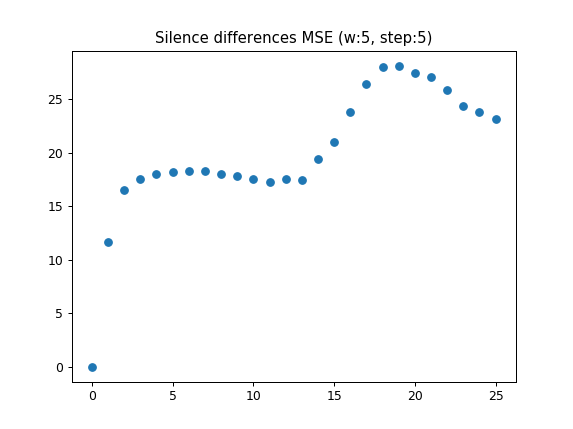

<IPython.core.display.Javascript object>


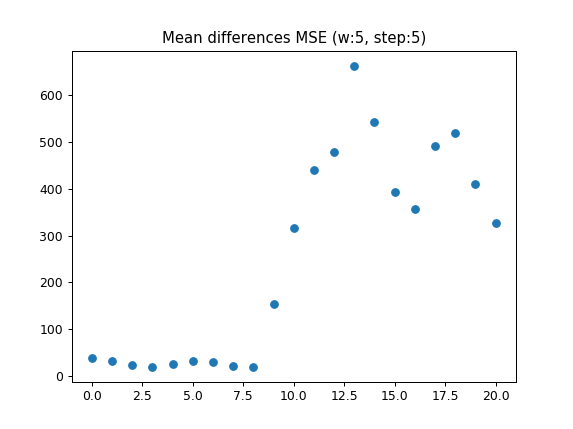

<IPython.core.display.Javascript object>


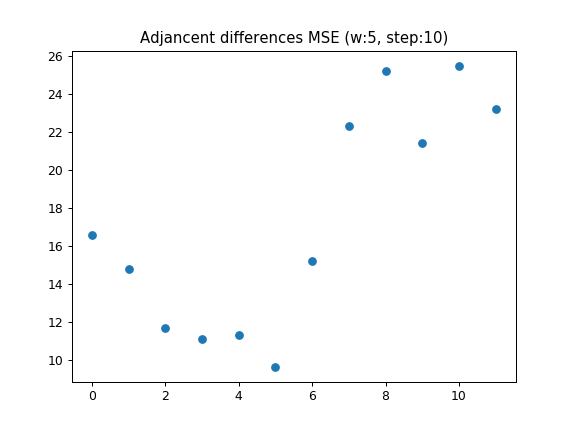

<IPython.core.display.Javascript object>


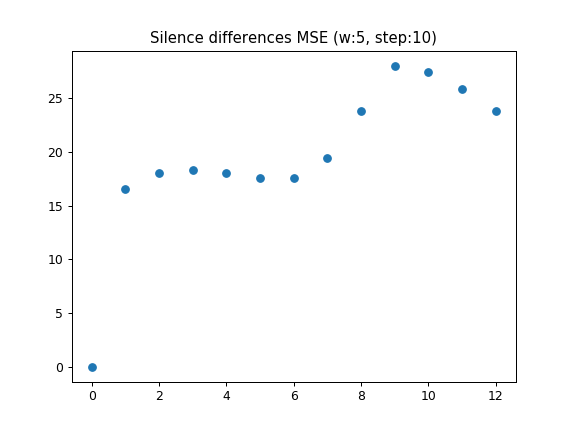

<IPython.core.display.Javascript object>


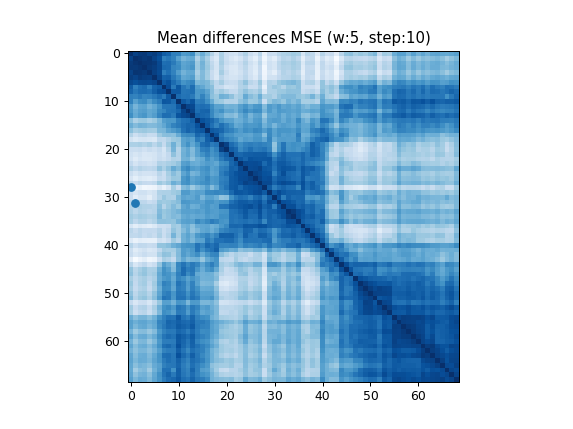

In [9]:
input_folder = '/media/schenock/01D1B41ED893D2C0/Projects/probable-joke/data/asl/03-M-04-C-comp'
frames = load_video_frames(input_folder)
analyse_frames(frames)

analyse_frames(frames, frame_step=5)

analyse_frames(frames, frame_step=10)

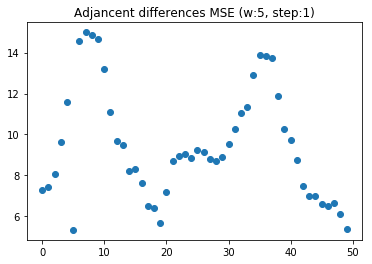

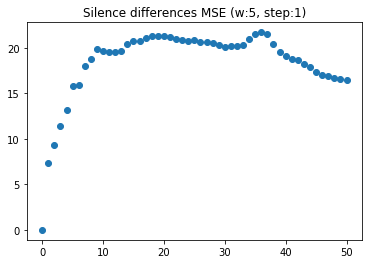

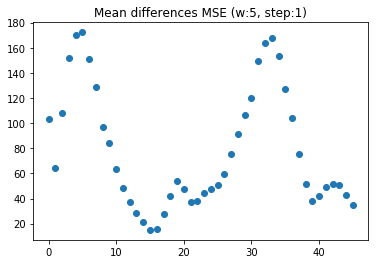

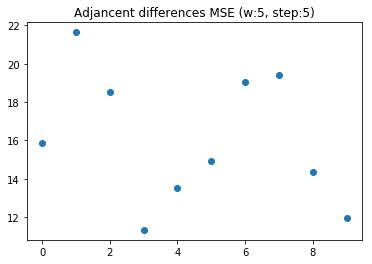

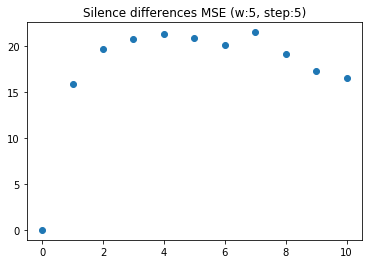

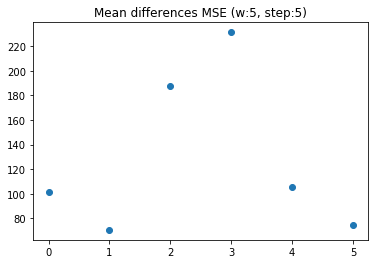

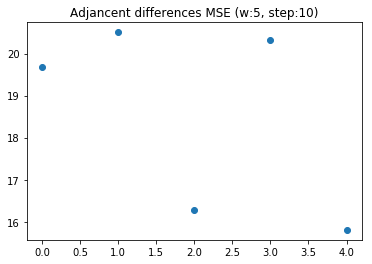

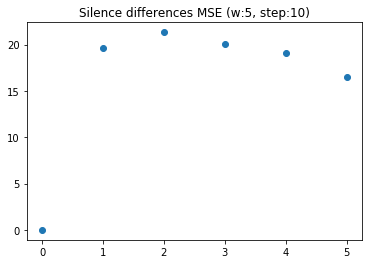

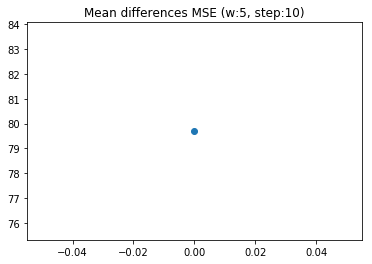

In [14]:
input_folder = '/Users/covix/Projects/probable-joke/data/asl/09-M-37-D-comp'
frames = load_video_frames(input_folder)
analyse_frames(frames)

analyse_frames(frames, frame_step=5)

analyse_frames(frames, frame_step=10)

In [20]:
def analyse_MSE(frames, window=5, frame_step=5):

    frames = frames[::frame_step]
    
    mean_diff = []
    
    cumulative_sum = np.sum(frames[:window], axis=0)
    for i in range(window, len(frames)):
        mean_diff.append(frames[i] - cumulative_sum / window)
        cumulative_sum += frames[i]
        cumulative_sum -= frames[i - window]
        
    mse = np.sum(np.square(mean_diff), axis=(1,2,3)).astype(np.float) / frames[0].size

    return mse
    

In [28]:
def max_value(inputlist):
    return max([sublist[-1] for sublist in inputlist])

def min_value(inputlist):
    return min([sublist[-1] for sublist in inputlist])



In [30]:
input_folder = '/media/schenock/01D1B41ED893D2C0/Projects/probable-joke/data/asl'

mse = []

count = 0

for video_folder in os.listdir(input_folder):
    
    print(video_folder)

    frames = load_video_frames(os.path.join(input_folder, video_folder))
    
    mse.append(analyse_MSE(frames, window=5, frame_step=5))

    count=count+1
    if count>5:
        break

print("Maximum mse: ", max_value(mse))
print("Minimum mse: ", min_value(mse))
        
# plt.figure()
# plt.title("Mean differences MSE (w:{}, step:{})".format("window", "frame_step"))
# for error in mse:
#     plt.plot(mse, 'o')
    

07-M-09-D-comp
01-M-01-C-comp
01-M-01-D-comp
01-M-02-C-comp
01-M-02-D-comp
01-M-03-C-comp
Maximum mse:  151.507411632
Minimum mse:  21.5548052083


In [58]:
features_01 = np.loadtxt("/media/schenock/01D1B41ED893D2C0/Projects/probable-joke/data/features/03-M-04-C-comp_features.csv")


features_01.shape


(128, 1024)

In [59]:
correlation_coeffs = np.corrcoef(features_01)

plt.imshow(correlation_coeffs, interpolation="None", cmap='Greens')
plt.colorbar()




0.100513873539


<IPython.core.display.Javascript object>


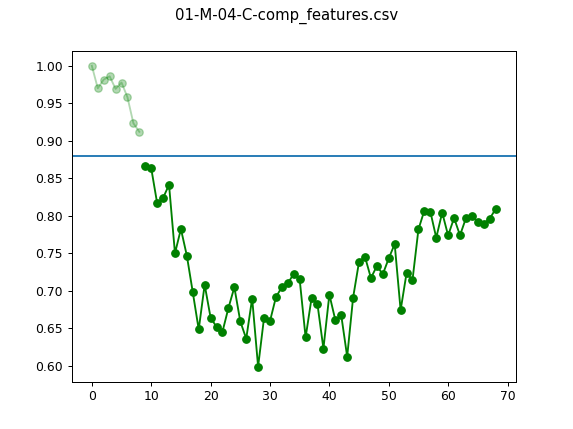

0.106680645191


<IPython.core.display.Javascript object>


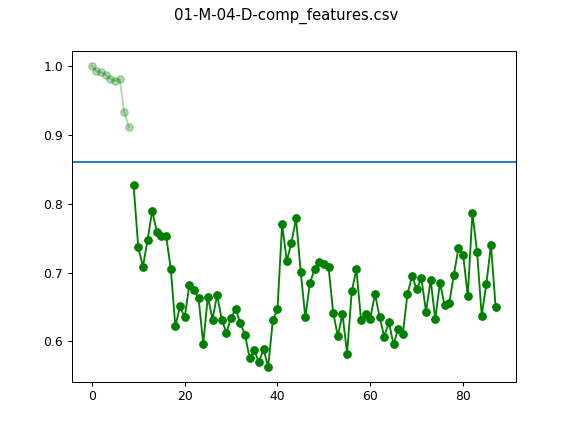

0.120160470209


<IPython.core.display.Javascript object>


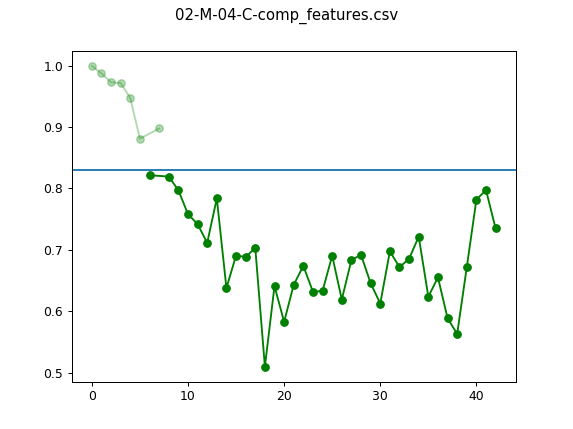

0.109954874509


<IPython.core.display.Javascript object>


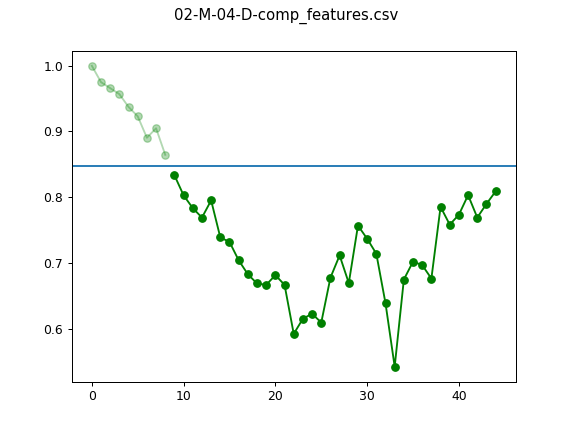

0.122077299164


<IPython.core.display.Javascript object>


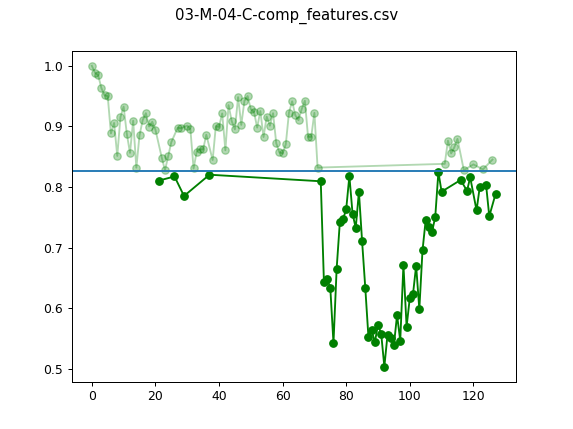

0.121451847021


<IPython.core.display.Javascript object>


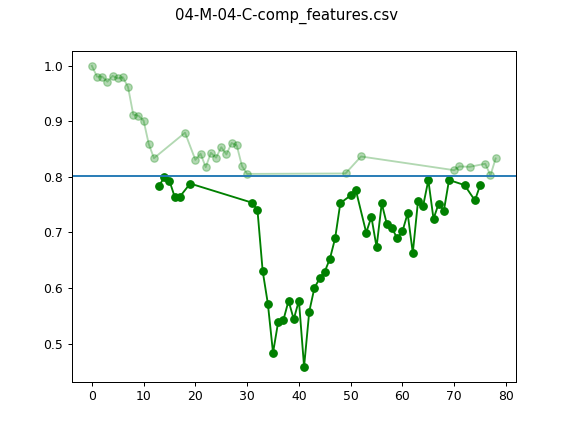

0.11681671633


<IPython.core.display.Javascript object>


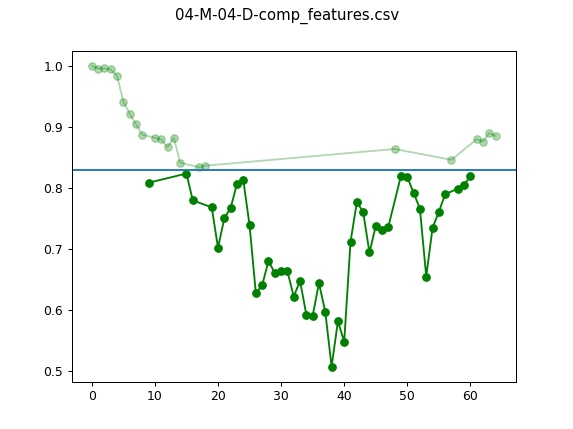

0.160664741041


<IPython.core.display.Javascript object>


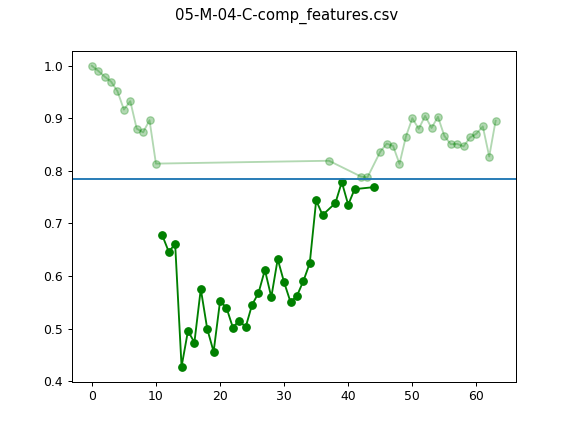

0.188949398887


<IPython.core.display.Javascript object>


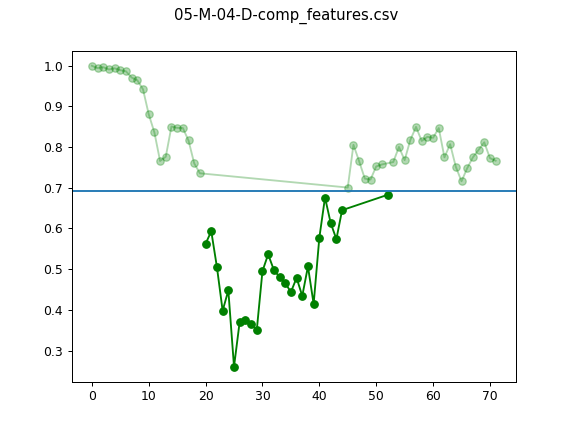

0.130995242303


<IPython.core.display.Javascript object>


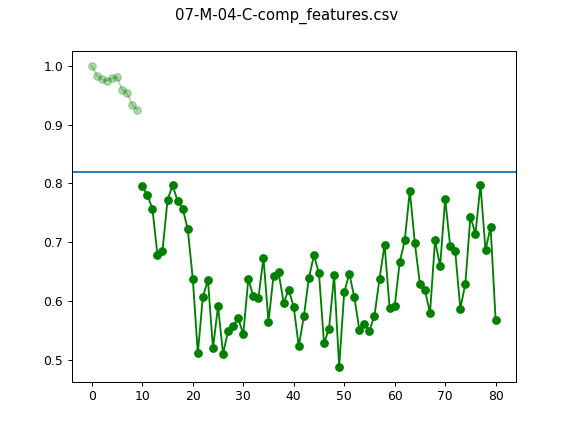

0.0942440532533


<IPython.core.display.Javascript object>


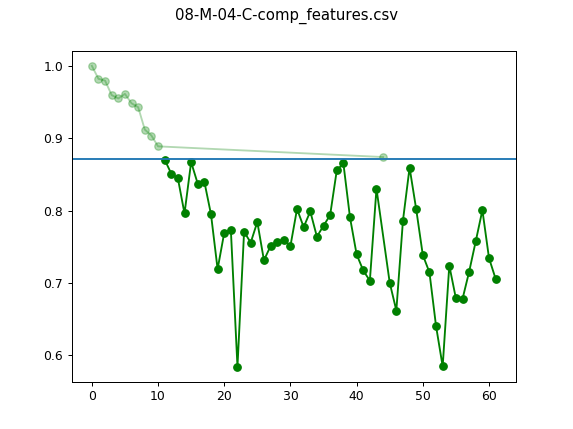

0.0817940328234


<IPython.core.display.Javascript object>


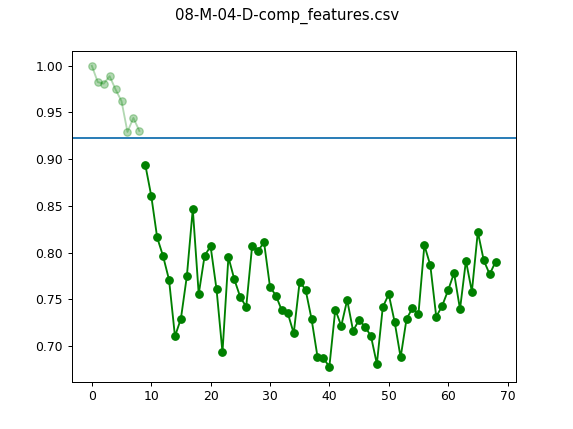

0.1015565907


<IPython.core.display.Javascript object>


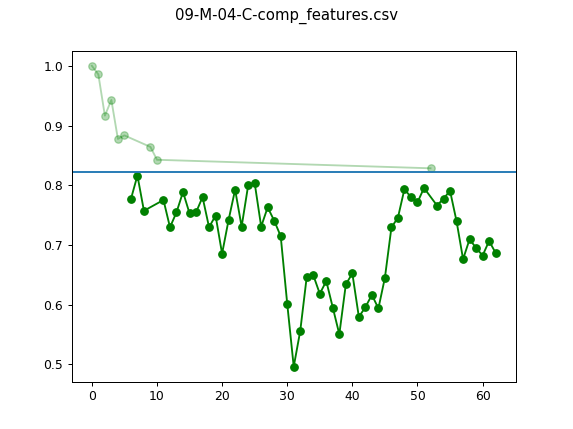

0.10428518127


<IPython.core.display.Javascript object>


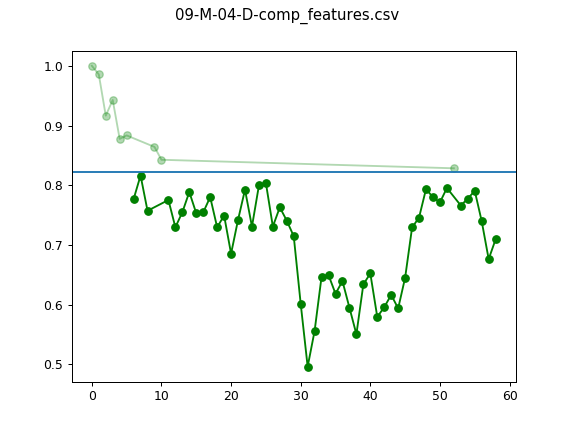

0.0757868306203


<IPython.core.display.Javascript object>


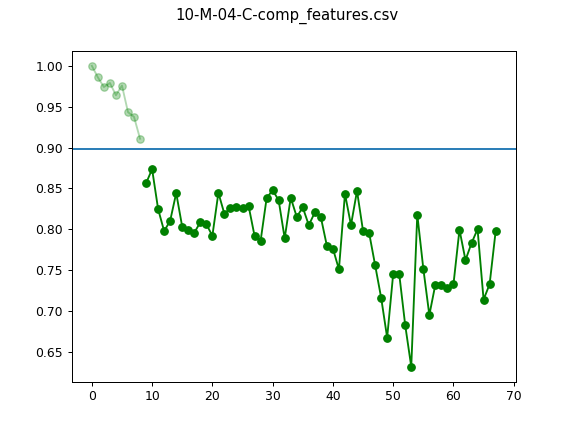

0.0743083613031


<IPython.core.display.Javascript object>


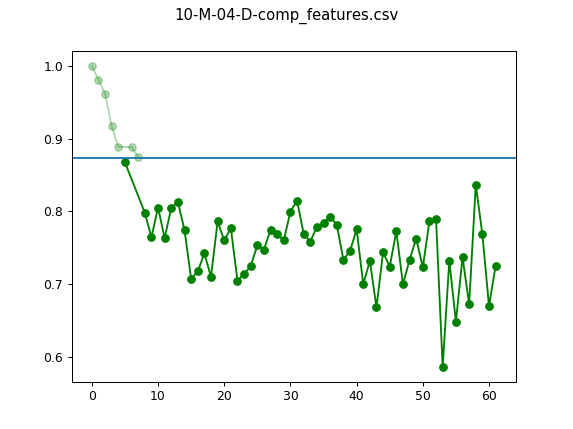

0.0958162864853


<IPython.core.display.Javascript object>


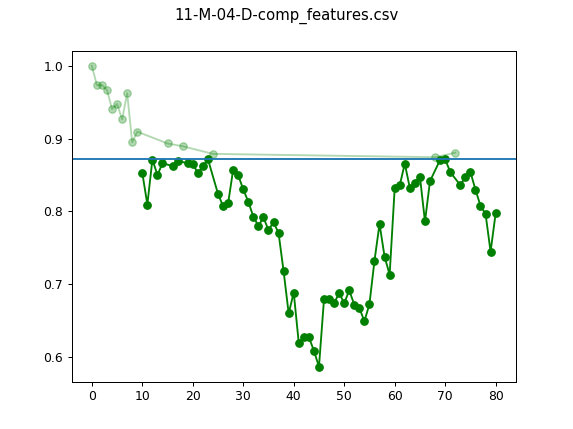

0.105019151349


<IPython.core.display.Javascript object>


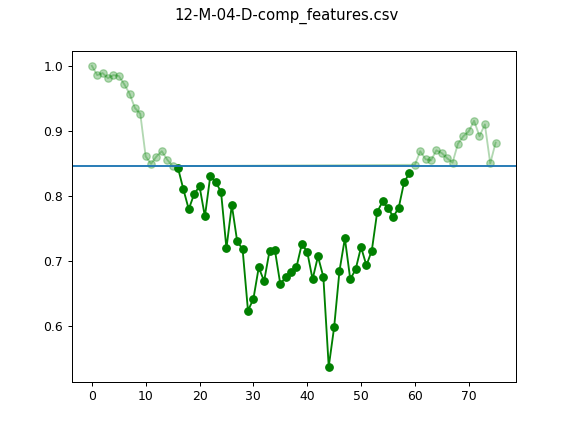

0.109110023243


<IPython.core.display.Javascript object>


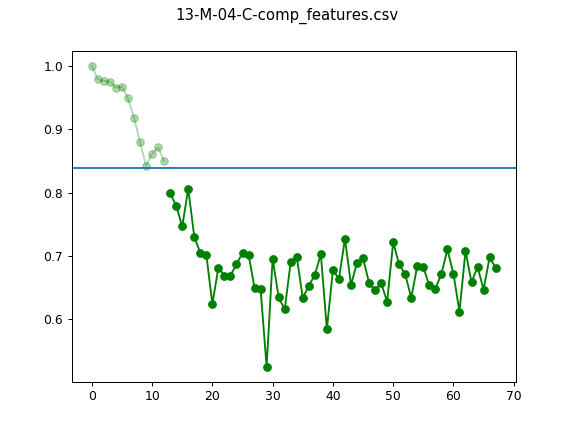

0.127951272998


<IPython.core.display.Javascript object>


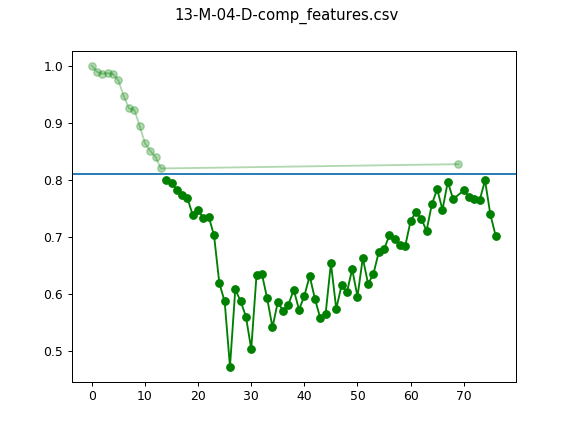

0.13250427878


/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


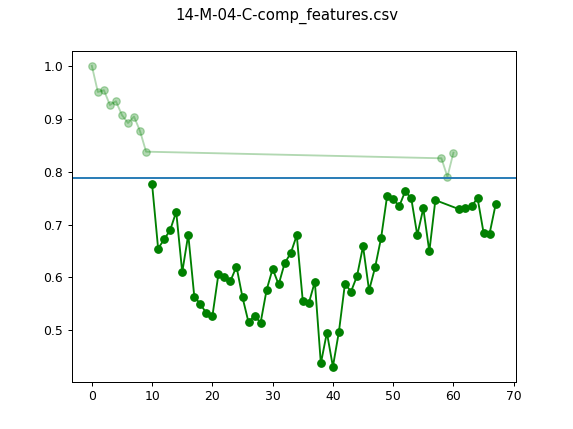

0.119999388007


<IPython.core.display.Javascript object>


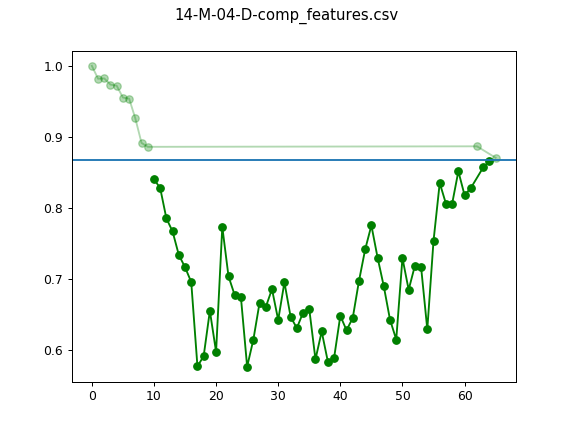

In [130]:
features_folder = "/media/schenock/01D1B41ED893D2C0/Projects/probable-joke/data/features"


th = 0.9


count = 0
for f in os.listdir(features_folder):
    features = np.loadtxt(os.path.join(features_folder, f))
    correlation_coeffs = np.corrcoef(features)
    
    print(np.std(correlation_coeffs[0]))
#     gauss_smooth = gaussian_filter1d(correlation_coeffs[0], sigma=9)
#     sav_smooth = savgol_filter(correlation_coeffs[0], window_length = 9, polyorder = 0)
     
    mini = min(correlation_coeffs[0])
    maxi = max(correlation_coeffs[0])
    cut = (((maxi - mini) / 2 ) + mini) * 1.1
    
    plt.figure()
    plt.suptitle(f)
    above = np.where(correlation_coeffs[0] > cut)[0]
    below = np.where(correlation_coeffs[0] < cut)[0]
    
    plt.plot(above, correlation_coeffs[0][above], "go-", alpha = 0.3)
    
    plt.plot(below, correlation_coeffs[0][below], "go-", alpha = 1)
 
    plt.axhline(y = cut)
       
